1.1. Simple linear regression uses one independent variable while multiple linear regression uses multiple independent variables. Multiple linear regression provides a more accurate model which has a smaller likelihood of falling into missing variable bias.

1.2. A continuous variable assumes that there is a linear relationship between it and the dependent variable while an indicator variable adjusts the intercept for different categories so in this case it is not a gradual change.

1.3. The model will then capture two different effects: the gradual impact of the continuous variable and the impact of the categorical variable which shifts the model based on group differences.

1.4. The continuous variable will effect different groups differently so depending on the group, the slope of the line will change instead of only the y-intercept changing.

1.5. This will give us a constant function that gives the mean of the group we are considering. Since these can either be "on" or "off" it'll be able to utilize binary encodings.

2. Continuous variables: 
TV advertising spending (Dollars)
Online advertising spending (Dollars)

2.1.
Without interaction:
Sales = B0 + B1(TV) + B2(Online) + e
B0 = Sales when nothing is spent on advertising
B1 = The effect of TV advertising on sales when online advertising spending is zero
B2 = The effect of online advertising on sales when TV advertising spending is zero

With interaction:
Sales = B0 + B1(TV) + B2(Online) + B3(TV x Online) + e
B0 = Sales when nothing is spent on advertising
B1 = The effect of TV advertising on sales when online advertising spending is zero
B2 = The effect of online advertising on sales when TV advertising spending is zero
B3 = The interaction effect between TV and online advertising spending

To make predictions with each of them the TV and online spending just needs to be substituted into the formula. The difference between them is that without interaction it assumes TV and online advertising are independent of each other while when there is interaction they are assumed to affect each other.

2.2.
Without interaction:
Sales = B0 + B1(TV_High) + B2(Online_High)

With interaction:
Sales = B0 + B1(TV_High) + B2(Online_High) + B3(TV_High x Online_High)

For each of these new variables they would be assigned a 1 if they are applicable and a 0 if they are not.

4. The model explaining 17.6% of the variability means that the R squared value is 0.176. This is not directly correlated to the statistical significance of coefficients because there are possibly other variables that impact the model which would then make the model less accurate while still holding the significance of the coefficients used. So the model likely captures significant effects from the variables used, however, it does not explain a large part of the data variability.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [10]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        02:56:21   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#5.
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This code is splitting the dataset in half randomly into pokeaman_train and pokeaman_test

In [12]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:56:28   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code is doing an OLS regression to predict the HP depending on the attack and defense and then it shows the summary data from this.

In [13]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


This code shows the R-squared value for the sample that the model was made with and then for the other half of the dataset which was not used to make the model.

In [14]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        02:56:28   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This code makes a new multiple linear regression model that shows the effect of attack, defense, speed and whether or not it is legendary. This also has interaction terms

In [15]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This code shows the R-squared value for the sample that the new multiple linear regression model was made with and then for the other half of the dataset which was not used to make the model. Since the out of sample R-squared value is so low it probably means the model overfitted to the given sample.

6. It creates new predictor variables by specifying main effects and interaction terms. Multicollinearity causes the model to overfit to the training data since the coefficients can be over influenced by the correlated predictors.

7.

In [16]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        02:56:30   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [17]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


model5_linear_form does not include interaction terms, it only includes the numerical predictors Attack, Defense, Speed, Legendary, Sp. Def and Sp. Atk. This adds more predictors than model3. Unlike model3 and model4, model5 includes categorical predictors that use binary variables which helps to capture differences between different groups without overfitting to the specific data. This model gives a good balance between model3 which underfits and model4 which overfits because of multicollinearity.

In [18]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        02:56:30   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


Model6 is created by taking out the less influential variables from model5. This is determined by the high p-value attached to these variables in model5. By doing this it will reduce overfitting to the sample data while also making the model easier to understand.

In [20]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        02:56:31   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [21]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [22]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [23]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


Model7 adds interaction terms for Attack, Speed, Sp. Def and Sp. Atk into model6. Since these predictors have statistical significance in model6 they can be used to give controlled multicollinearity which will increase predictability without overfitting to the sample data.

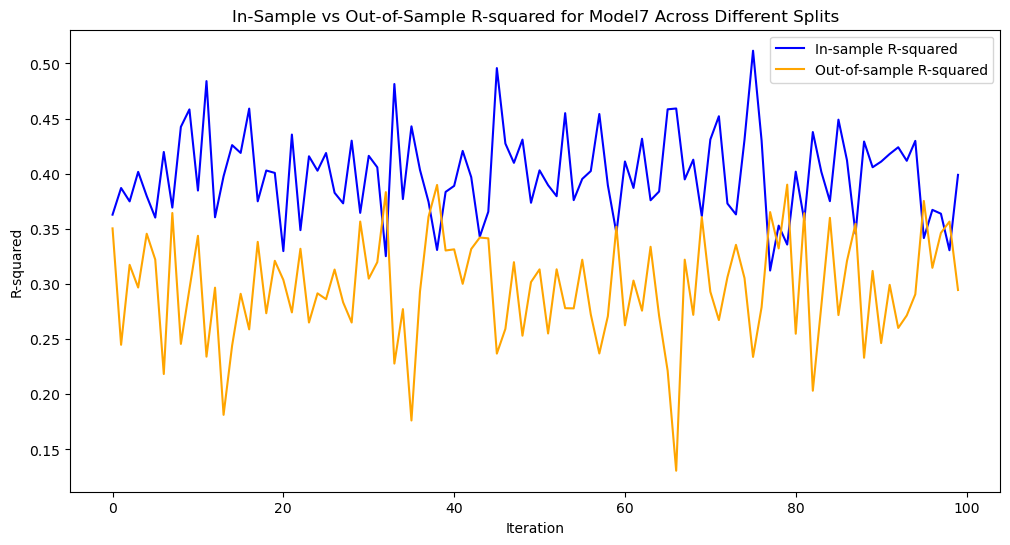

In [24]:
#8
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Number of iterations to run
num_iterations = 100

# Lists to store in-sample and out-of-sample R-squared values
in_sample_r2 = []
out_of_sample_r2 = []

# Loop to generate metrics across different random splits
for i in range(num_iterations):
    # Create a new random split each iteration without setting a seed
    train_data, test_data = train_test_split(pokeaman, train_size=0.5)

    # Define Model7's specification
    model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
    model7_linear_form += ' + I(Q("Type 1")=="Normal")'
    model7_linear_form += ' + I(Q("Type 1")=="Water")'
    model7_linear_form += ' + I(Generation==2)'
    model7_linear_form += ' + I(Generation==5)'
    
    model7_spec = smf.ols(formula=model7_linear_form, data=train_data)
    model7_fit = model7_spec.fit()
    
    # In-sample R-squared
    in_sample_r2.append(model7_fit.rsquared)
    
    # Out-of-sample R-squared (on test data)
    y_pred = model7_fit.predict(test_data)
    y_true = test_data.HP
    out_of_sample_r2.append(np.corrcoef(y_true, y_pred)[0, 1]**2)

# Visualizing in-sample vs out-of-sample R-squared values
plt.figure(figsize=(12, 6))
plt.plot(in_sample_r2, label='In-sample R-squared', color='blue')
plt.plot(out_of_sample_r2, label='Out-of-sample R-squared', color='orange')
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('In-Sample vs Out-of-Sample R-squared for Model7 Across Different Splits')
plt.legend()
plt.show()

The meaning of our results is to see how "well" our model performs in sample and out of sample over time. If there are large fluctuations then the model may be sensitive to the data used in training which can be a sign of overfitting. This also just gives us an easy way to compare how the model fits the in-sample vs out-of-sample to give a clear indication if there is overfitting.

In [25]:
#9.
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.39896705495122187 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [26]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.39896705495122187 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [27]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [28]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


These blocks of code all compare one of our created models to a more realistic version of our model where we would only get some of our data and we would need to predict future data. Our idealized model has access to half of the total dataset which will account for changes in the population over time while our realistic models cannot do this as we have not seen how the population will change in the future. It also illustrates the importance of not overfitting models as model7 does not work as well when it is predicting future data which is seen in the first 2 code blocks while the simpler model6 still works pretty well.

ChatGPT Summary:

"Comprehensive Summary of Regression Model Development and Interpretation

In this conversation, we worked through various steps and principles for developing and interpreting regression models, initially exploring the differences between models with and without interaction terms. We discussed how adding interaction terms, especially between continuous and binary indicator variables, influences the behavior of a regression model, altering the relationships it can capture between predictor variables and the outcome.

We then applied these principles to a hypothetical example involving a company's advertising budgets, examining how TV and online ad spending might interact and affect sales outcomes. This setup required creating linear forms for models both with and without interactions and interpreting these forms to understand the impact of interaction on predictions.

Next, we explored model-building code with statsmodels, specifically:

Constructing models step-by-step (model3 through model7), examining the addition of variables and interaction terms, and observing how these affected model fit.
Comparing "in-sample" and "out-of-sample" performance to assess generalization and detect issues like multicollinearity, particularly when using complex models with many predictors and interaction terms.
We further looked at creating a loop to repeatedly split the dataset into training and testing sets, helping illustrate model performance variability under different random splits. This led to insights on the trade-off between model complexity and generalizability.

To reinforce understanding, we then analyzed a code example with model7_gen1_predict_future, which aimed to fit a model on one subset (e.g., Generation 1 Pokémon) and evaluate it on another (non-Generation 1 Pokémon). This demonstrated how fitting a model on specific data can impact its predictive accuracy when applied to different data, revealing potential limitations of overfitting and model applicability to different groups.

Finally, in preparation for a course project involving the Canadian Social Connection Survey data, we outlined a plan to:

Fit logistic regression models while interpreting them as if they were linear regressions for simplicity.
Use the model summary to assess statistical significance and practical importance of each predictor variable.
Visualize the effects of interaction terms between continuous and binary predictors using Plotly, simulating random noise to add realism to the plots.
Overall, this conversation provided a robust walkthrough of regression analysis techniques, model interpretation, and strategies for understanding the complexities of interaction terms and generalization in statistical modeling."